In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Generating and Plotting 1000 random co-ordinates in the range (0,1)

In [127]:
coords = np.random.rand(1000,2)

In [128]:
coords

array([[0.18083055, 0.68489456],
       [0.90064886, 0.16026537],
       [0.35663165, 0.15059747],
       ...,
       [0.15280427, 0.82250185],
       [0.65246773, 0.50000276],
       [0.87441035, 0.73394248]])

In [129]:
df = pd.DataFrame(coords)

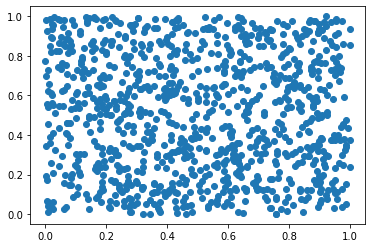

In [130]:
x,y = zip(*coords)
plt.scatter(x,y)
plt.show()

###  Converting list of tuples into a dataframe for Linear Regression

In [131]:
data = pd.DataFrame(coords, columns =['x', 'y'])

In [132]:
data

,x,y
0,0.180831,0.684895
1,0.900649,0.160265
2,0.356632,0.150597
3,0.506106,0.391215
4,0.158863,0.874340
...,...,...
995,0.609753,0.086500
996,0.772633,0.795752
997,0.152804,0.822502
998,0.652468,0.500003


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


### Assigning 'x' and 'y' values and finding line of best fit using gradient descent 

In [134]:
x = data.iloc[:,0]
y = data.iloc[:,1]

In [135]:
# y = mx + c
m = 0
c = 0

### Linear Regression

In [136]:
import math
num=0
den = 0


for i in range(len(x)):
    num+=(x[i]-np.mean(x))*(y[i]-np.mean(y))
    den+=math.sqrt(((x[i]-np.mean(x))**2)*(y[i]-np.mean(y))**2)
    
r = num/den

In [137]:
n = len(x)

Sy=sum((np.sqrt((y-np.mean(y))**2)))/n-1
Sx=sum((np.sqrt((x-np.mean(x))**2)))/n-1

m=r*(Sy/Sx)
c=np.mean(y)-m*np.mean(x)

print('m = ', m)
print('c = ', c)

m =  -0.050241598807229226
c =  0.530766416753168


In [138]:
y_pred = c + m*x

### Gradient Descent

In [139]:
lr = 0.01
iterations = 10000
n = float(1000)

In [140]:
#Find Derivative of 'm' and 'c' using Error 
'''
Error = 1/n(sum(y - (mx +c))^2)
'''


#Differentiate Error
'''
Dm = -2/n(sum(x(y - y_pred)))
Dc = -2/n(sum((y - y_pred)))
'''


#Updating current values of 'm' and 'c'
'''
m = m - lr*Dm
c = c - lr*Dc
'''

'\nm = m - lr*Dm\nc = c - lr*Dc\n'

In [141]:
for i in range(iterations): 
    y_pred = m*x + c 
    Dm = (-2/n) * sum(x * (y - y_pred))
    Dc = (-2/n) * sum(y - y_pred)
    m = m - lr * Dm  
    c = c - lr * Dc
    
print ('m = ',m)
print('c = ',c)

m =  -0.039698665247144646
c =  0.5254990154760635


### Linear Regression using SKLearn

In [151]:
p = pd.DataFrame(data['x'])
q = pd.DataFrame(data['y'])


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(p,q,test_size=0.3,random_state=666)

In [152]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [153]:
y_pred = reg.predict(x_test)

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

print('mae:', mean_absolute_error(y_test,y_pred))
print('mse:', math.sqrt(mean_squared_error(y_test,y_pred)))

mae: 0.25305462694939196
mse: 0.29360766336554117


In [156]:
print(reg.intercept_)
print(reg.coef_)

[0.54058301]
[[-0.07590789]]
